In [1]:
# Импортируем библиотеки и фреймворки
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [64]:
# Обрабатываем данные
class_names = ["Setosa", "Versicolor", "Virginica"]
dataset = load_iris()
(trainX, testX, trainY, testY) = train_test_split(dataset.data,
    dataset.target, random_state=3, test_size=0.25)

trainX = trainX / 7.9
testX = testX / 7.9

In [69]:
# Создание модели нейронной сети
model = keras.Sequential([
                          keras.layers.Dense(4),
                          keras.layers.Dense(10, activation="relu"),
                          keras.layers.Dense(3, activation="softmax")
])

In [106]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [79]:
# Обучение модели
history = model.fit(trainX, trainY, epochs=1000)

4/4 [==============================] - 0s 5ms/step - loss: 0.2941 - accuracy: 0.9911
Epoch 136/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2920 - accuracy: 0.9911
Epoch 137/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.9911
Epoch 138/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2888 - accuracy: 0.9911
Epoch 139/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2865 - accuracy: 0.9911
Epoch 140/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.9911
Epoch 141/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2826 - accuracy: 0.9911
Epoch 142/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.9911
Epoch 143/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9911
Epoch 144/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2769 - accuracy: 0.9911
Epoch 145/1000


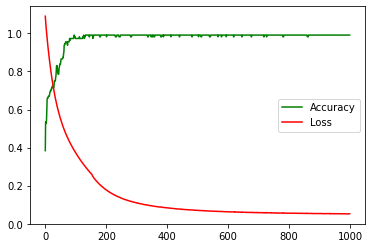

In [80]:
model_history = pd.DataFrame(history.history)

plt.figure()
plt.plot(model_history.index , model_history.accuracy, label='Accuracy', color="g")
plt.plot(model_history.index , model_history.loss, label='Loss', color="r")
plt.legend()
plt.show()

In [81]:
# Тестирование натренировоной модели
test_loss, test_acc = model.evaluate(testX, testY)
print(f'loss: {str(test_loss)[:6]} - accuracy: {str(test_acc)[:6]}')

2/2 [==============================] - 0s 8ms/step - loss: 0.0514 - accuracy: 0.9737
loss: 0.0514 - accuracy: 0.9736


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [84]:
# Предсказываем
predictions = model.predict(testX)

In [105]:
index = 21 # от 0 до 37

x = class_names[np.argmax(predictions[index])]
x1 = class_names[testY[index]]

print(f"{x} : {x1}")

Virginica : Virginica
